In [2]:
import os
import numpy as np
import pandas as pd
import csv
import sklearn
import matplotlib.pyplot as plt
assert sklearn.__version__ >= "0.20"

### **Get and Download the Dataset**

In [6]:
import pandas as pd

iris = pd.read_csv("/Users/raoabdul/Documents/Development/Learning-ML/Model Examples and Practice/Practice - Kaggle/Iris/Iris.csv")

iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


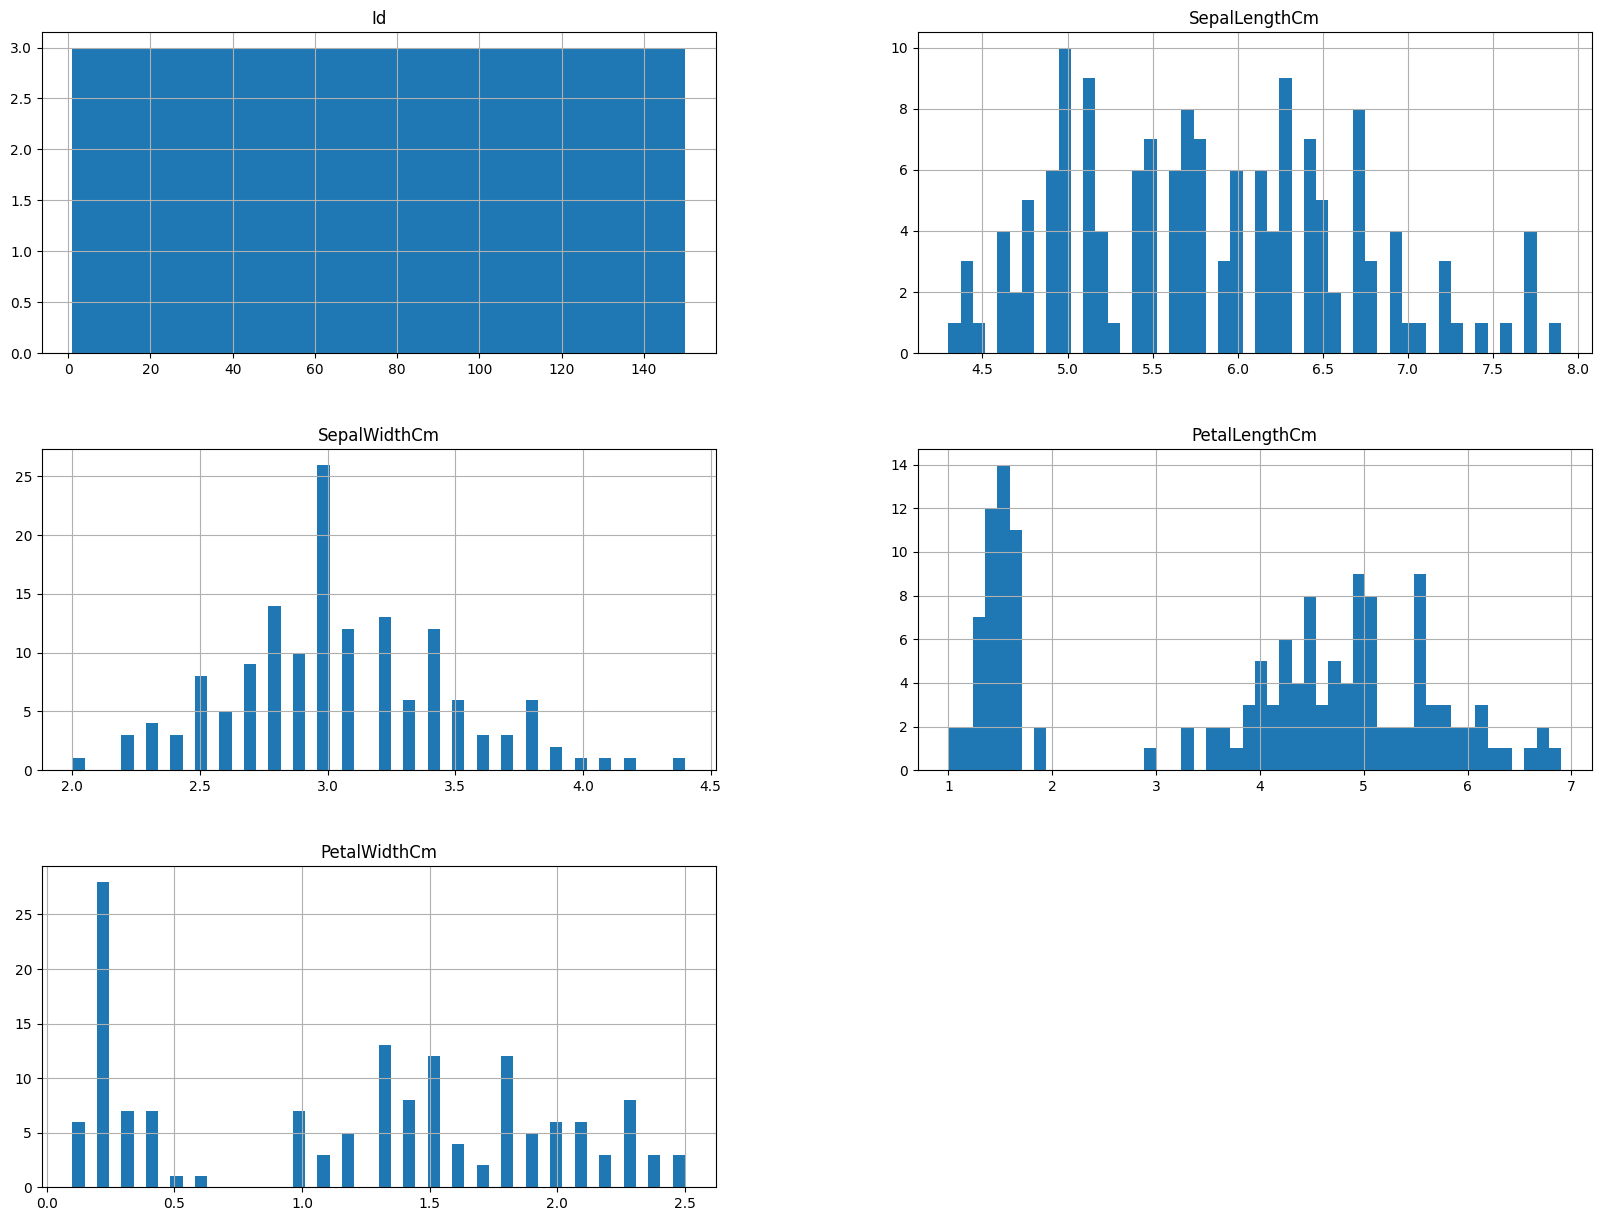

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
iris.hist(bins=50, figsize=(20,15))
plt.show()

### **Create a Test and Train Dataset**

In [10]:
import numpy as np

np.random.seed(42)

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(iris, 0.2)
len(train_set)

120

### **Discover and Visualise The Data**

In [11]:
test_set.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
73,74,6.1,2.8,4.7,1.2,Iris-versicolor
18,19,5.7,3.8,1.7,0.3,Iris-setosa
118,119,7.7,2.6,6.9,2.3,Iris-virginica
78,79,6.0,2.9,4.5,1.5,Iris-versicolor
76,77,6.8,2.8,4.8,1.4,Iris-versicolor


In [15]:
corr_matrix = iris.corr(numeric_only=True)

corr_matrix["SepalWidthCm"].sort_values(ascending=False)

SepalWidthCm     1.000000
SepalLengthCm   -0.109369
PetalWidthCm    -0.356544
Id              -0.397729
PetalLengthCm   -0.420516
Name: SepalWidthCm, dtype: float64

array([[<Axes: xlabel='SepalWidthCm', ylabel='SepalWidthCm'>,
        <Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>,
        <Axes: xlabel='PetalWidthCm', ylabel='SepalWidthCm'>,
        <Axes: xlabel='PetalLengthCm', ylabel='SepalWidthCm'>],
       [<Axes: xlabel='SepalWidthCm', ylabel='SepalLengthCm'>,
        <Axes: xlabel='SepalLengthCm', ylabel='SepalLengthCm'>,
        <Axes: xlabel='PetalWidthCm', ylabel='SepalLengthCm'>,
        <Axes: xlabel='PetalLengthCm', ylabel='SepalLengthCm'>],
       [<Axes: xlabel='SepalWidthCm', ylabel='PetalWidthCm'>,
        <Axes: xlabel='SepalLengthCm', ylabel='PetalWidthCm'>,
        <Axes: xlabel='PetalWidthCm', ylabel='PetalWidthCm'>,
        <Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>],
       [<Axes: xlabel='SepalWidthCm', ylabel='PetalLengthCm'>,
        <Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>,
        <Axes: xlabel='PetalWidthCm', ylabel='PetalLengthCm'>,
        <Axes: xlabel='PetalLengthCm', ylabel='PetalL

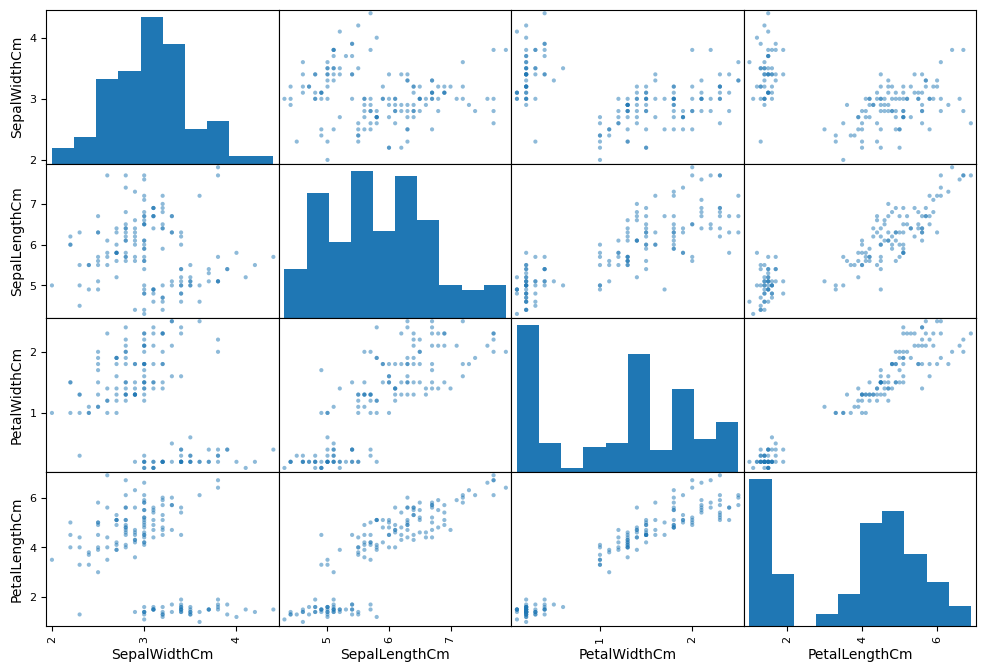

In [16]:
from pandas.plotting import scatter_matrix

attributes = ["SepalWidthCm", "SepalLengthCm", "PetalWidthCm", "PetalLengthCm"]
scatter_matrix(iris[attributes], figsize=(12, 8))